# Overview

This notebook documents the end-to-end workflow for scraping, preprocessing, and analyzing user reviews from selected mobile banking applications. The main steps and methodologies are outlined below:

## 1. Data Collection

- **Automated Scraping:**  
    Utilized a custom `ScrapeReview` class to programmatically collect user reviews and basic metadata from three mobile banking apps.
- **Configuration:**  
    Specified app IDs, enabled saving of results, set retry logic, and controlled scraping delays for robust data acquisition.

## 2. Data Exploration

- **Initial Inspection:**  
    Displayed the first few rows of the scraped reviews to understand the structure and content.
- **Missing Values & Duplicates:**  
    Checked for missing values and duplicate entries to assess data quality before further processing.

## 3. Data Preprocessing

- **Cleaning Pipeline:**  
    Employed a `DataPreprocessor` class to clean the raw reviews, handling tasks such as removing duplicates, handling missing values, and standardizing formats.
- **Saving Cleaned Data:**  
    Saved the cleaned dataset for reproducibility and further analysis.

## 4. Exploratory Data Analysis (EDA)

- **App-wise Review Distribution:**  
    Visualized the distribution of reviews and ratings for each app to identify trends and outliers.
- **Value Counts:**  
    Analyzed the number of reviews per app to compare user engagement.

## Next Steps / Plan

- **Sentiment Analysis:**  
    Plan to apply NLP techniques to extract sentiment and key themes from the reviews.
- **Feature Engineering:**  
    Intend to engineer additional features (e.g., review length, keyword presence) for deeper insights.
- **Comparative Analysis:**  
    Will compare user feedback across different apps to identify strengths and weaknesses.
- **Reporting:**  
    Summarize findings and actionable recommendations for stakeholders.

---

This structured approach ensures a comprehensive understanding of user feedback, supporting data-driven improvements for mobile banking applications.

In [1]:
import sys
import os

sys.path.append(os.path.abspath("../scripts"))
from scrape_reviews import ScrapeReview

app_ids = ["com.combanketh.mobilebanking", "com.dashen.dashensuperapp", "com.boa.boaMobileBanking"]
scraper = ScrapeReview(
    app_ids=app_ids,
    save=True,
    scrape_metadata=False,
    max_retries=5,
    delay=1.5
)

reviews_df = scraper.get_reviews()
metadata = scraper.get_metadata()

print(f"Scraped {len(reviews_df)} reviews")
print(f"Scraped metadata for {len(metadata)} apps")

Scraping reviews for 3 apps...


Scraping apps:  33%|███▎      | 1/3 [00:17<00:34, 17.40s/it]c:\Users\segni\Documents\GitHub\banking-app-review-analysis\scripts\scrape_reviews.py:133: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, df], ignore_index=True)
Scraping apps: 100%|██████████| 3/3 [01:34<00:00, 31.50s/it]

Data saved to ../data\raw_reviews.csv
Data also saved as JSON to ../data\raw_reviews.json
Scraped 6494 reviews
Scraped metadata for 0 apps


In [2]:
reviews_df.head()

,reviewId,userName,content,score,thumbsUpCount,at,app_id
0,a7d1c799-ba53-4a0a-a8d6-c5400a009825,A Google user,A great app. It's like carrying a bank in your...,4,0,2025-06-07 20:21:52,com.combanketh.mobilebanking
1,64ed5562-1758-4eb8-9291-8b6edc394118,A Google user,More than garrantty bank EBC.,4,0,2025-06-07 18:21:26,com.combanketh.mobilebanking
2,d0c05687-ddd4-43fb-95a9-08f6358d80a2,A Google user,really am happy to this app it is Siple to use...,5,0,2025-06-07 11:02:38,com.combanketh.mobilebanking
3,811bf820-3529-433a-9b6d-e624fa23a16a,A Google user,I liked this app. But the User interface is ve...,2,0,2025-06-07 10:50:29,com.combanketh.mobilebanking
4,be2cb2ac-bbe0-4175-81c4-9f6c86afdaaa,A Google user,"""Why don’t your ATMs support account-to-accoun...",4,0,2025-06-06 09:54:11,com.combanketh.mobilebanking


### Data preprocess

In [3]:
reviews_df.isna().sum()

reviewId         0
userName         0
content          0
score            0
thumbsUpCount    0
at               0
app_id           0
dtype: int64

In [4]:
# Check duplicate data rows 

reviews_df.duplicated().sum()

np.int64(0)

In [5]:
import sys
import os

sys.path.append(os.path.abspath("../scripts"))
from preprocess import DataPreprocessor


input_file = "../data/raw_reviews.csv"
output_file = "../data/cleaned_reviews.csv"
# Initialize with verbose output
preprocessor = DataPreprocessor(
    input_file=input_file,
    output_file=output_file,
    save=True,
    verbose=True
)

# Get cleaned data
cleaned_data = preprocessor.get_cleaned_data()

# Check results
print(f"Final cleaned data has {len(cleaned_data)} records")
cleaned_data.head()

Loading data from ../data/raw_reviews.csv
Successfully loaded 6494 records
Starting data preprocessing
Dropped 0 records with missing values
Dropped 0 duplicate records
Successfully saved 6494 records to ../data/cleaned_reviews.csv
Final cleaned data has 6494 records


,review_id,app_id,app_name,user_name,review,rating,thumbs_up_count,date
0,a7d1c799-ba53-4a0a-a8d6-c5400a009825,com.combanketh.mobilebanking,Combanketh,A Google user,A great app. It's like carrying a bank in your...,4,0,2025-06-07 20:21:52
1,64ed5562-1758-4eb8-9291-8b6edc394118,com.combanketh.mobilebanking,Combanketh,A Google user,More than garrantty bank EBC.,4,0,2025-06-07 18:21:26
2,d0c05687-ddd4-43fb-95a9-08f6358d80a2,com.combanketh.mobilebanking,Combanketh,A Google user,really am happy to this app it is Siple to use...,5,0,2025-06-07 11:02:38
3,811bf820-3529-433a-9b6d-e624fa23a16a,com.combanketh.mobilebanking,Combanketh,A Google user,I liked this app. But the User interface is ve...,2,0,2025-06-07 10:50:29
4,be2cb2ac-bbe0-4175-81c4-9f6c86afdaaa,com.combanketh.mobilebanking,Combanketh,A Google user,"""Why don’t your ATMs support account-to-accoun...",4,0,2025-06-06 09:54:11


### **Cleaned data**

In [6]:
cleaned_data.app_name.value_counts()

app_name
Combanketh    5000
Boa           1044
Dashen         450
Name: count, dtype: int64

### EDA

c:\Users\segni\Documents\GitHub\banking-app-review-analysis\scripts\analysis_and_visualization.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\segni\Documents\GitHub\banking-app-review-analysis\scripts\analysis_and_visualization.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


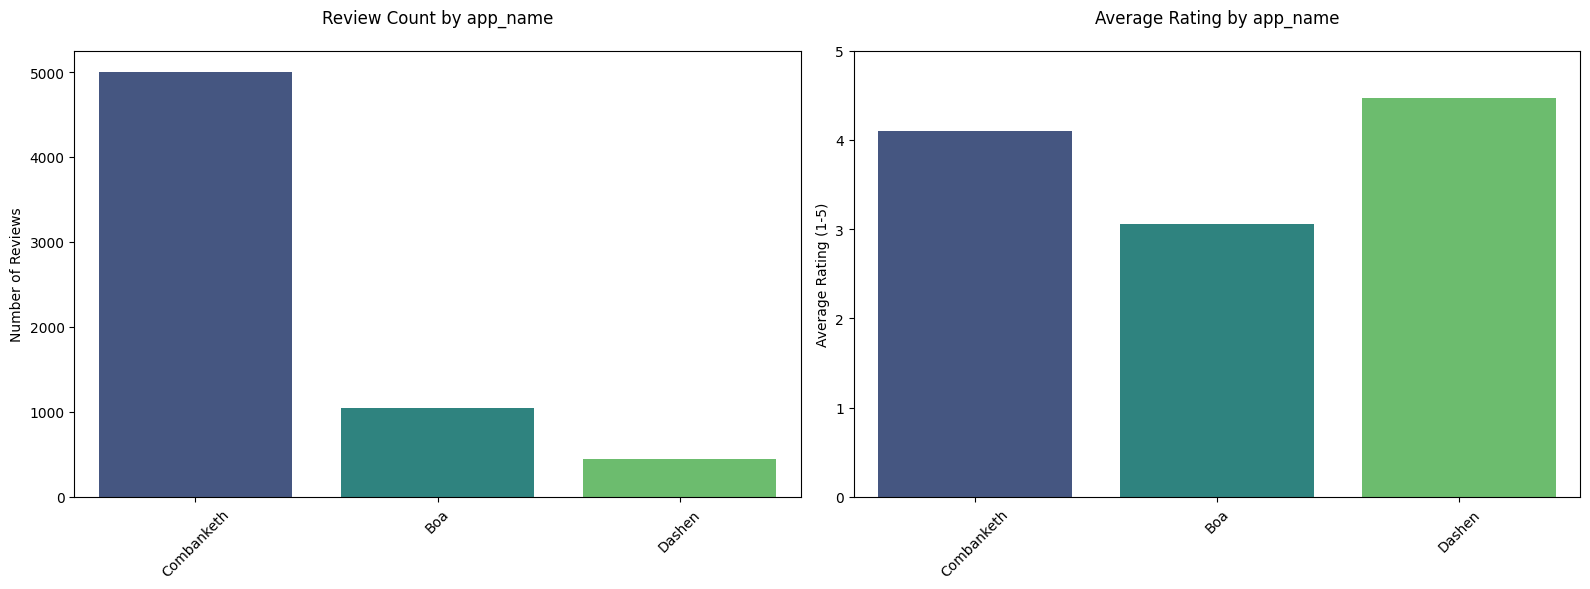

In [7]:
from analysis_and_visualization import visualize_rating_distribution_side_by_side

visualize_rating_distribution_side_by_side(cleaned_data, "app_name");